In [3]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt5
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import ticker
import csv
import numpy as np
import os

## Load data

In [29]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_fault_only_0.0001'
dir_list = os.listdir(log_folder)
num_robots = 15
balance_ens = []
for idx in range(num_robots):
    balance_record = []
    csv_file = log_folder+'/'+str(int(idx+1))+'/balance.csv'
    with open(csv_file,"r") as f:
        reader = csv.reader(f, delimiter=' ')
        next(reader, None)
        for row in reader:
            balance_record.append(float(row[2]))
    balance_ens.append(balance_record)

## Balance evolution of top 3 best agents and worst agents
STD difference between agents: 0.001

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


minimum_length:  1766


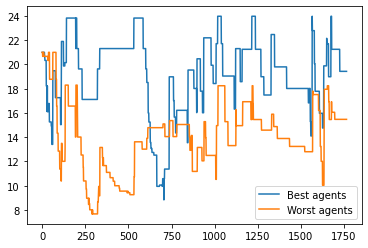

In [31]:
top_agents=3
top_agent_balance = []

#look for minimum record length
length = len(balance_ens[0])
for record in balance_ens:
    if len(record)<length:
        length=len(record)
print('minimum_length: ',length)

top_agent_balance = np.array(balance_ens[0][:length])
worst_agent_balance = np.array(balance_ens[-1][:length])
for idx in range(top_agents-1):
    top_agent_balance += np.array(balance_ens[idx+1][:length])
    worst_agent_balance += np.array(balance_ens[-(idx+2)][:length])
top_agent_balance/=top_agents
worst_agent_balance/=top_agents
plt.plot(top_agent_balance, label = "Best agents")
plt.plot(worst_agent_balance, label = "Worst agents")
plt.legend()
plt.show()
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_0001.eps', format='eps')

## Balance evolution of top 3 best agents and worst agents
STD difference between agents: 0.003

In [ ]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_fault_only_0.0003'
dir_list = os.listdir(log_folder)
num_robots = 15
balance_ens = []
for idx in range(num_robots):
    balance_record = []
    csv_file = log_folder+'/'+str(int(idx+1))+'/balance.csv'
    with open(csv_file,"r") as f:
        reader = csv.reader(f, delimiter=' ')
        next(reader, None)
        for row in reader:
            balance_record.append(float(row[2]))
    balance_ens.append(balance_record)
top_agents=3
top_agent_balance = []

#look for minimum record length
length = len(balance_ens[0])
for record in balance_ens:
    if len(record)<length:
        length=len(record)
print('minimum_length: ',length)

top_agent_balance = np.array(balance_ens[0][:length])
worst_agent_balance = np.array(balance_ens[-1][:length])
for idx in range(top_agents-1):
    top_agent_balance += np.array(balance_ens[idx+1][:length])
    worst_agent_balance += np.array(balance_ens[-(idx+2)][:length])
top_agent_balance/=top_agents
worst_agent_balance/=top_agents
plt.plot(top_agent_balance, label = "Best agents")
plt.plot(worst_agent_balance, label = "Worst agents")
plt.legend()
#plt.show()
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_0003.eps', format='eps')

## Balance evolution of the malicious agent

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


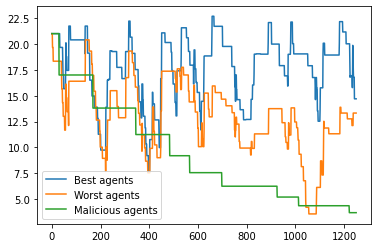

In [55]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_constant_redistribution_002'
dir_list = os.listdir(log_folder)
num_robots = 16
balance_ens = []
for idx in range(num_robots):
    balance_record = []
    csv_file = log_folder+'/'+str(int(idx+1))+'/balance.csv'
    with open(csv_file,"r") as f:
        reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
        next(reader, None)
        for row in reader:
            if len(row)>0:
                balance_record.append(float(row[2]))
    balance_ens.append(balance_record)
top_agents=3
top_agent_balance = []
#look for minimum record length
length = len(balance_ens[0])
for record in balance_ens:
    if len(record)<length:
        length=len(record)
length = 1250
top_agent_balance = np.array(balance_ens[0][:length])
worst_agent_balance = np.array(balance_ens[-2][:length])
malicious_agent_balance = np.array(balance_ens[-1][:length])
for idx in range(top_agents-1):
    top_agent_balance += np.array(balance_ens[idx+1][:length])
    worst_agent_balance += np.array(balance_ens[-(idx+3)][:length])
top_agent_balance/=top_agents
worst_agent_balance/=top_agents
plt.plot(top_agent_balance, label = "Best agents")
plt.plot(worst_agent_balance, label = "Worst agents")
plt.plot(malicious_agent_balance, label = "Malicious agents")
plt.legend()
#plt.show()
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_with_malicious_0002.eps', format='eps')

## Ratio between deposit for Food and Non-Food of confirmed food sources

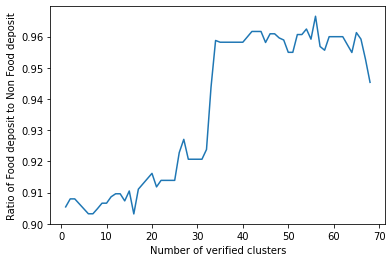

In [54]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_003_with_cluster_tracking'
csv_file = log_folder+'/'+str(int(1))+'/cluster_status.csv'
ratio_list=[]
ratio_idx_list=[]
idx=1
sw=30
ratio_list_smooth=[]
with open(csv_file,"r") as f:
        reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
        next(reader, None)
        for row in reader:
            if len(row)>0:
                if int(row[9][0]) == int(row[-1]) == 1 and int(row[6][:-1])==15:
                    ratio_list.append(float(row[8][:-1])/float(row[7][:-1]))
                    ratio_idx_list.append(idx)
            idx+=1
for idx in range(len(ratio_list)-sw):
    ratio_list_smooth.append(np.sum(ratio_list[idx:idx+sw])/sw)
plt.plot(ratio_idx_list[:-sw],ratio_list_smooth)
plt.xlabel("Number of verified clusters")
plt.ylabel("Ratio of Food deposit to Non Food deposit")
plt.savefig('/home/hzhao/blockchain_robots/geth-argos/FraudForaging/results/3agents_verified_clusters_0003.eps', format='eps')

## Number of confirmed non-food-source points

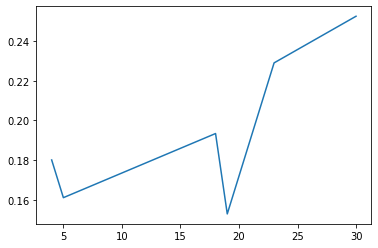

In [53]:
log_folder = '/home/hzhao/blockchain_robots/geth-argos/FraudForaging/experiments_log/logs_non_even_003_with_cluster_tracking'
csv_file = log_folder+'/'+str(int(1))+'/cluster_status.csv'
ratio_list=[]
ratio_idx_list=[]
idx=1
sw=5
ratio_list_smooth=[]
with open(csv_file,"r") as f:
        reader = csv.reader([x.replace('\0', '') for x in f], delimiter=' ')
        next(reader, None)
        for row in reader:
            if len(row)>0:
                if int(row[9][0]) == int(row[-1]) == 0 and int(row[6][:-1])==15:
                    ratio_list.append(float(row[8][:-1])/float(row[7][:-1]))
                    ratio_idx_list.append(idx)
            idx+=1
for idx in range(len(ratio_list)-sw):
    ratio_list_smooth.append(np.sum(ratio_list[idx:idx+sw])/sw)
plt.plot(ratio_idx_list[:-sw],ratio_list_smooth)
plt.show()